In [50]:
#%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

electric_vehicles= pd.read_csv('Electric_Vehicle_Population_Data.cs1v')
del electric_vehicles['Postal Code']
del electric_vehicles['Clean Alternative Fuel Vehicle (CAFV) Eligibility']
del electric_vehicles['Legislative District']
del electric_vehicles['DOL Vehicle ID']
del electric_vehicles['2020 Census Tract']
electric_vehicles.rename(columns={'VIN (1-10)': 'Vehicle_ID', 'Model Year': 'Model_Year',
                   'Electric Vehicle Type': 'Electric_Vehicle_Type',
                  'Electric Range': 'Electric_Range',
                   'Vehicle Location': 'Vehicle_Location',
                   'Electric Utility': 'Electric_Utility'
                  }, inplace= True)

In [51]:
max_ER_per_year = {}
for i in range(len(electric_vehicles)):
    if electric_vehicles['Model_Year'][i] in max_ER_per_year:
        max_ER_per_year[electric_vehicles['Model_Year'][i]].append(electric_vehicles['Electric_Range'][i])
    else:
        max_ER_per_year[electric_vehicles['Model_Year'][i]] = [electric_vehicles['Electric_Range'][i]]
for year, ER in max_ER_per_year.items(): max_ER_per_year[year] = max(ER)

In [53]:
electric_vehicles

,Vehicle_ID,County,City,State,Model_Year,Make,Model,Electric_Vehicle_Type,Electric_Range,Base MSRP,Vehicle_Location,Electric_Utility
0,3C3CFFGE4E,Yakima,Yakima,WA,2014,FIAT,500,Battery Electric Vehicle (BEV),87,0,POINT (-120.524012 46.5973939),PACIFICORP
1,5YJXCBE40H,Thurston,Olympia,WA,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),200,0,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC
2,3MW39FS03P,King,Renton,WA,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),20,0,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
3,7PDSGABA8P,Snohomish,Bothell,WA,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),0,0,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC
4,5YJ3E1EB8L,King,Kent,WA,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),322,0,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
...,...,...,...,...,...,...,...,...,...,...,...,...
166795,3FA6P0SU4D,Spokane,Spokane,WA,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),19,0,POINT (-117.369705 47.62637),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...
166796,5YJYGDEE5M,King,Sammamish,WA,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0,0,POINT (-122.0313266 47.6285782),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
166797,7SAYGDEE5N,Snohomish,Mukilteo,WA,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),0,0,POINT (-122.299965 47.94171),PUGET SOUND ENERGY INC
166798,1G1RH6E43D,Lewis,Mossyrock,WA,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),38,0,POINT (-122.487535 46.5290135),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...


<IPython.core.display.Javascript object>


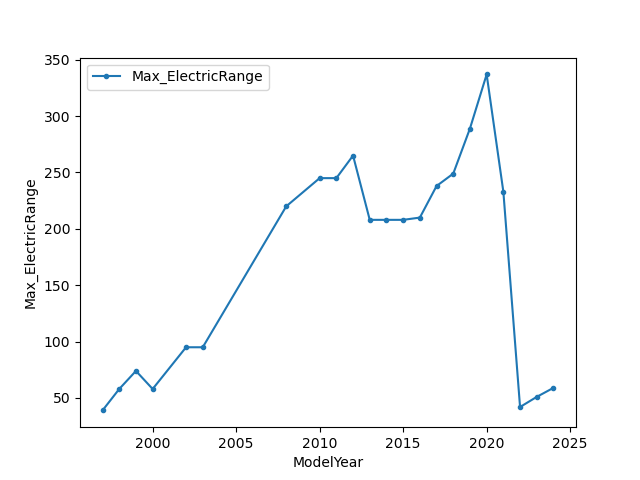

<Axes: xlabel='ModelYear', ylabel='Max_ElectricRange'>

In [54]:
max_ER_year = pd.DataFrame(max_ER_per_year.items(), columns= ('ModelYear', 'Max_ElectricRange')).sort_values(by= 'ModelYear')
max_ER_year.plot.line('ModelYear', 'Max_ElectricRange', marker= '.',xlabel= 'ModelYear', ylabel= 'Max_ElectricRange')

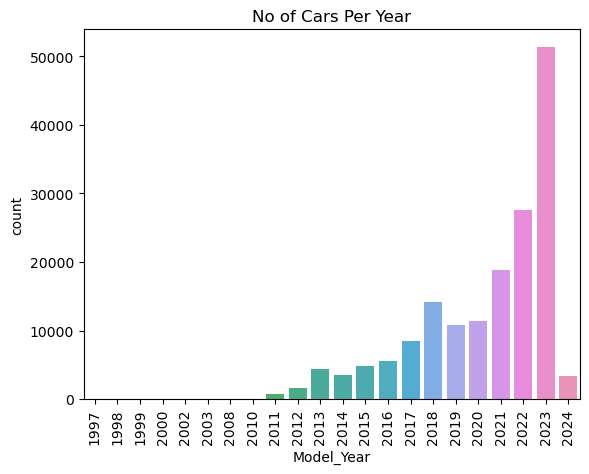

In [22]:
sns.countplot(x = 'Model_Year', data = electric_vehicles)
plt.xticks(rotation= 90)
plt.title('No of Cars Per Year')
plt.show()

In [24]:
from statistics import mean
max_ave_msrp_per_make = {}
for i in range(len(electric_vehicles)):
    if electric_vehicles['Make'][i] in max_ave_msrp_per_make:
        max_ave_msrp_per_make[electric_vehicles['Make'][i]].append(electric_vehicles['Base MSRP'][i])
    else:
        max_ave_msrp_per_make[electric_vehicles['Make'][i]] = [electric_vehicles['Base MSRP'][i]]
for make, msrp in max_ave_msrp_per_make.items(): max_ave_msrp_per_make[make] = [max(msrp), mean(msrp)]

In [40]:
make_values = [make for make in max_ave_msrp_per_make if max_ave_msrp_per_make[make][0] != 0]
max_values = [max_ave_msrp_per_make[make][0] for make in max_ave_msrp_per_make if max_ave_msrp_per_make[make][0] != 0]
ave_values = [max_ave_msrp_per_make[make][1] for make in max_ave_msrp_per_make if max_ave_msrp_per_make[make][0] != 0] 

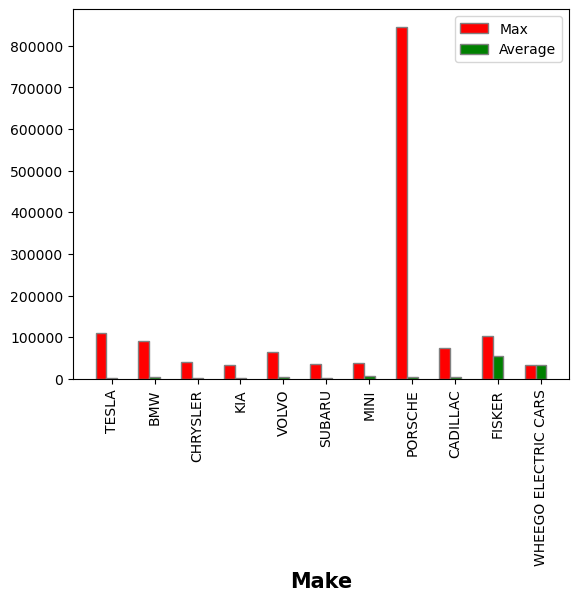

In [49]:
import numpy as np 
import matplotlib.pyplot as plt 

barWidth = 0.25

br1 = np.arange(len(max_values)) 
br2 = [x + barWidth for x in br1] 

plt.bar(br1, max_values, color ='r', width = barWidth, 
		edgecolor ='grey', label ='Max', ) 
plt.bar(br2, ave_values, color ='g', width = barWidth, 
		edgecolor ='grey', label ='Average') 


plt.xlabel('Make', fontweight ='bold', fontsize = 15)
plt.ylabel = 'Max/Average Base MSRP'
plt.xticks([r + barWidth for r in range(len(max_values))], 
		make_values)
plt.xticks(rotation= 90)

plt.legend()
plt.show() 
